# AIML - EL 2

## Linear Regression 

Import Dataset

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

Data Exploration

In [16]:
raw_data = pd.read_csv('automobile_dataset.csv')

In [17]:
# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [18]:
# Let's see the description of each columns in dataset
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Preprocessing

In [19]:
# Removing unwanted columns Model
data = raw_data.drop(['Model'],axis=1)

# Dealing with missing values
data.isnull().sum()*100/len(data)

# Removing missing rows
data.dropna(axis=0, inplace=True)

Dealing with Outliers

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


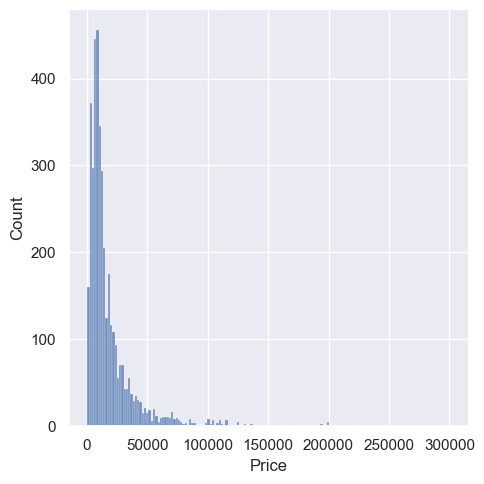

In [21]:
# PRICE
sns.displot(data['Price'])

In [22]:
data['Price'].describe()

count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


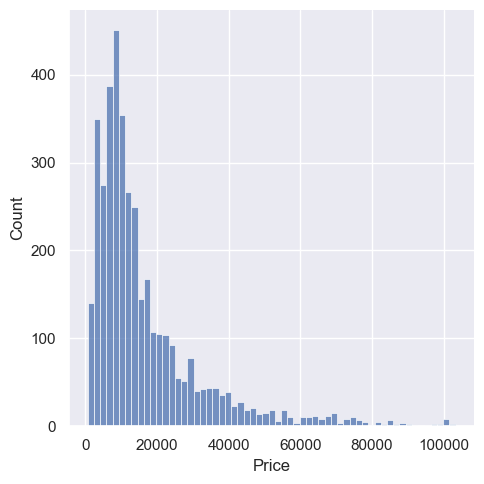

In [23]:
q = data['Price'].quantile(0.98)
data = data[data['Price']<q]
sns.displot(data['Price'])

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


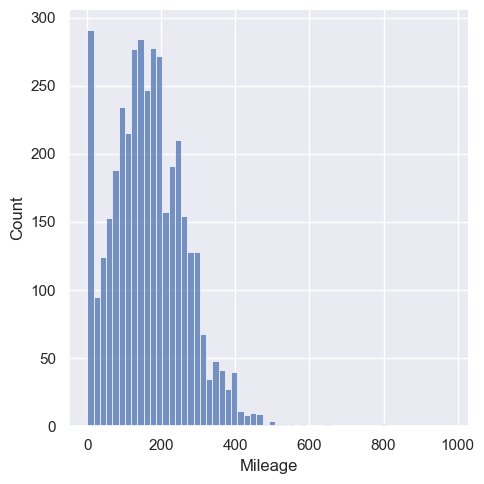

In [24]:
# MILEAGE
sns.displot(data['Mileage'])

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


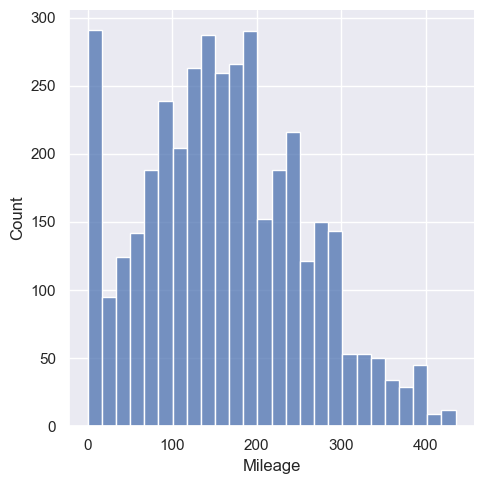

In [25]:
q = data['Mileage'].quantile(0.99)
data = data[data['Mileage']<q]
sns.displot(data['Mileage'])

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


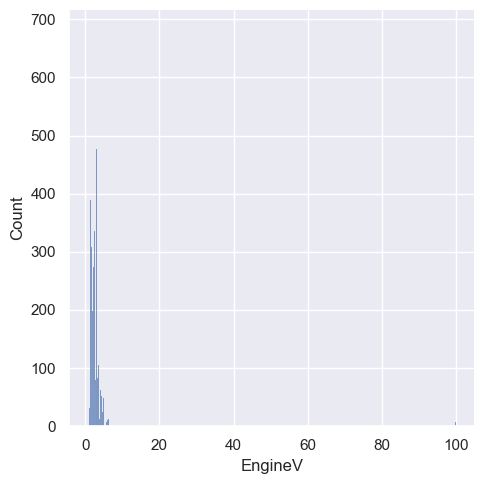

In [26]:
# ENGINE
sns.displot(data['EngineV'])

In [27]:
data['EngineV'].describe()

count    3903.000000
mean        2.742242
std         5.005715
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


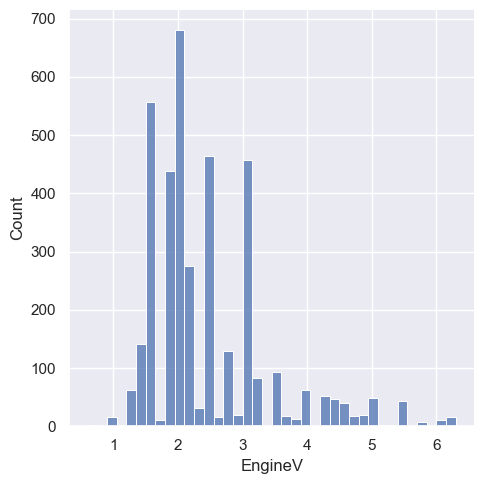

In [28]:
data = data[data['EngineV']<6.5]
sns.displot(data['EngineV'])

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


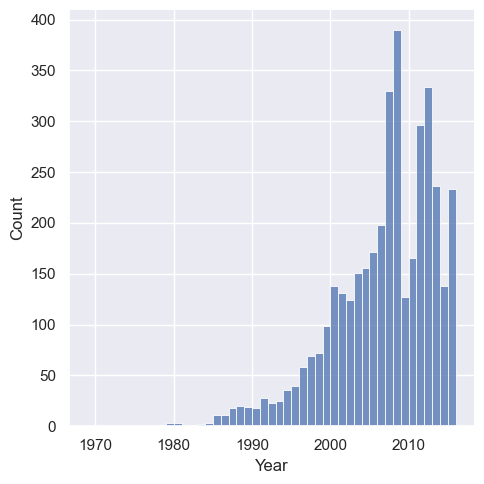

In [29]:
sns.displot(data['Year'])

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


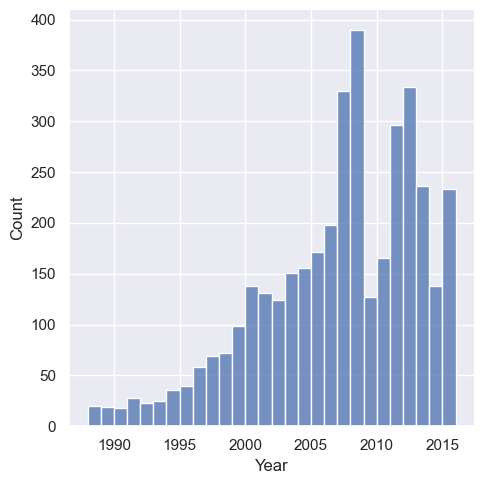

In [30]:
q = data['Year'].quantile(0.01)
data = data[data['Year']>q]
sns.displot(data['Year'])

In [31]:
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994


In [62]:
data_cleaned =  data.reset_index(drop=True)
data_cleaned.describe(include='all')

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3826.000000,3826.000000,3826.000000,3826,3826,3826,3826,3826,3826,3826,3826,3826,3826,3826,3826,3826,3826,3826
unique,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
freq,NaN,NaN,NaN,3207,3105,3524,3394,3330,2978,3573,3456,2372,3454,3218,3258,3727,2439,3464
mean,9.391879,162.166231,2.441777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.850353,94.831169,0.947973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.684612,0.000000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.881836,94.000000,1.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.350102,159.000000,2.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.952278,227.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the Linearity of Assumption

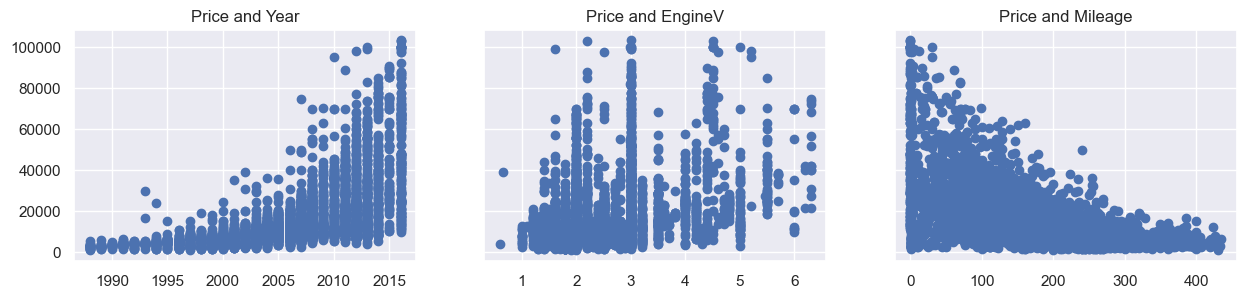

In [33]:
# let’s check how the price is distrubuted with the other numberical columns “Year”, “EngineV” and “Mileage”

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [34]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price

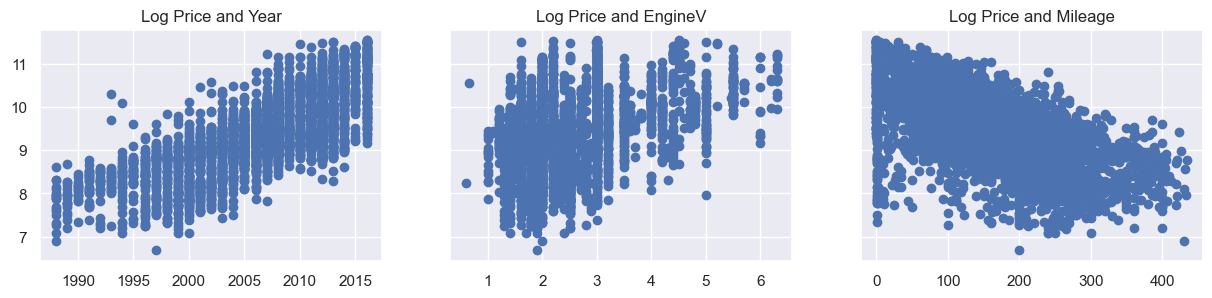

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [36]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [37]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.899033,Mileage
1,10.307533,Year
2,7.637076,EngineV


In [38]:
data = data_cleaned.drop(['Year'],axis=1)

In [39]:
# Dummification

data =pd.get_dummies(data, drop_first=True)

In [40]:
data.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [43]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data = data[cols]

## Linear Regression

In [46]:
data_preprocessed = data.copy()
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [48]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

# Import the module for the split
from sklearn.model_selection import train_test_split

# Spliting the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [49]:
# Create a linear regression object
reg = LinearRegression()

# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [50]:
# Checking the outputs of the regression
y_hat = reg.predict(x_train)

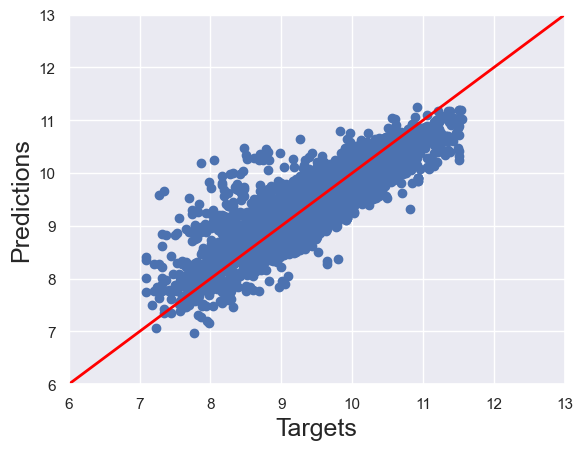

In [68]:
# Comparing the targets (y_train) and the predictions (y_hat)
plt.scatter(y_train, y_hat)
plt.plot([6, 13], [6, 13], color='red', linewidth=2)
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residuals Probability Density Function')

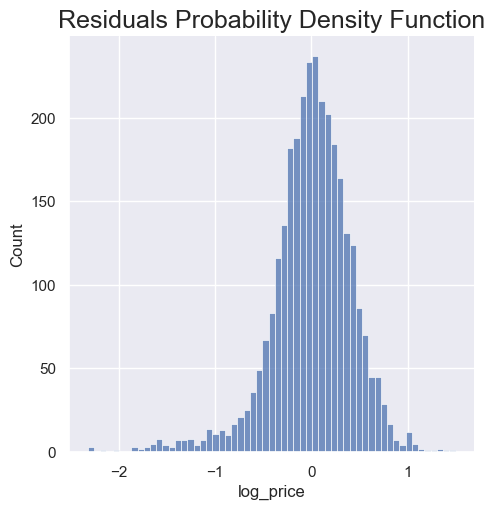

In [69]:
sns.displot(y_train - y_hat)

plt.title("Residuals Probability Density Function", size=18)

In [53]:
score =reg.score(x_train,y_train)
intercept =reg.intercept_
coefficents =reg.coef_

print("Score: ", score)
print("Intercept: ", intercept)
print("Coefficents: ", coefficents)

Score:  0.7494553293190431
Intercept:  9.387782816691688
Coefficents:  [-0.43588103  0.20992556  0.00349    -0.00918508 -0.14030828 -0.1805565
 -0.06326013 -0.09911693 -0.14571937 -0.09759722 -0.19919649 -0.1326728
 -0.16230903 -0.11548866 -0.02457821 -0.14279025  0.31416213]


In [54]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.435881
1,EngineV,0.209926
2,Brand_BMW,0.003490
3,Brand_Mercedes-Benz,-0.009185
4,Brand_Mitsubishi,-0.140308
5,Brand_Renault,-0.180556
6,Brand_Toyota,-0.063260
7,Brand_Volkswagen,-0.099117
8,Body_hatch,-0.145719
9,Body_other,-0.097597


In [55]:
y_hat_test = reg.predict(x_test)

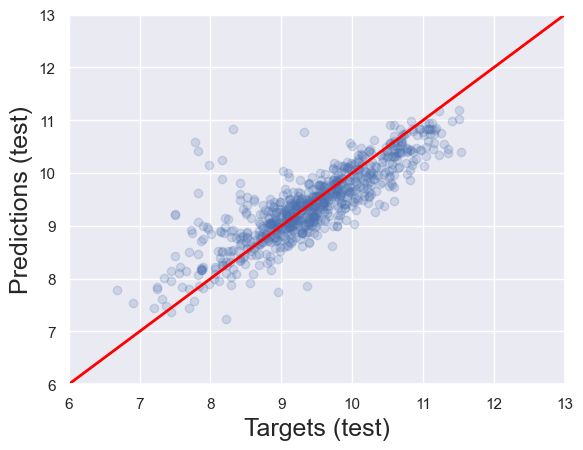

In [71]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.plot([6, 13], [6, 13], color='red', linewidth=2)
plt.xlabel('Targets (test)',size=18)
plt.ylabel('Predictions (test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [58]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,16851.982021,NaN
1,3083.358207,7900.0
2,13699.093320,NaN
3,13010.578900,NaN
4,19365.981091,NaN
...,...,...
761,8509.446944,NaN
762,29052.144626,2700.0
763,11875.503539,NaN
764,6517.014266,NaN


In [59]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,16851.982021,24700.0,7848.017979,31.773352
1,3083.358207,4000.0,916.641793,22.916045
2,13699.093320,18300.0,4600.906680,25.141567
3,13010.578900,15600.0,2589.421100,16.598853
4,19365.981091,14200.0,-5165.981091,36.380149
...,...,...,...,...
761,8509.446944,6900.0,-1609.446944,23.325318
762,29052.144626,26500.0,-2552.144626,9.630734
763,11875.503539,14899.0,3023.496461,20.293285
764,6517.014266,5000.0,-1517.014266,30.340285
